<h1 style="text-align: center;">Otimização de Receita e Ocupação no Airbnb de Nova York</h1>

<h2 style="text-align: center;">Fatores-Chave para o Sucesso e a Satisfação do Hóspede</h2>

<p style="text-align: center;">
<a href="https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data">NYC Airbnb Open Data - Kaggle</a>
</p>

### Descrição:

>Este conjunto de dados contém informações detalhadas sobre imóveis listados no Airbnb na cidade de Nova York, incluindo: tipo de imóvel, data da última avaliação recebida, valor da diária, localização, entre outras variáveis úteis.


### Justificativa da Escolha

> O dataset representa um problema real, com alto impacto econômico, relevância de mercado e grande potencial analítico. A análise de imóveis mais rentáveis e procurados em Nova York — uma das cidades mais turísticas e competitivas do mundo — revela oportunidades imediatas para otimizar marketing, precificação, riscos e experiência do usuário (melhorar a jornada do hóspede usando dados).


### Definição do Problema de Negócios

>O desafio da Airbnb é maximizar ocupação, receita e satisfação ao identificar como localização, sazonalidade, preços, avaliações e perfil de anfitriões impactam o sucesso. Integrando esses fatores, podemos otimizar experiências, reduzir cancelamentos e criar estratégias personalizadas, reforçando nossa liderança e gerando valor sustentável para hóspedes e anfitriões. Dito isso, o analista de dados deve responder as seguintes perguntas:

>1. Quais são as características dos imóveis com maior taxa de ocupação e receita? Responder a esta pergunta permite identificar os fatores de sucesso que geram maior retorno financeiro.
>2. Quais são os bairros com maior concentração de imóveis com alta taxa de cancelamento e por quê? Responder a esta pergunta permite identificar os fatores de risco que geram maior impacto a estabilidade e a imagem da Airbnb. 

### 📘 Dicionário dos Dados


| Variável | Explicação |
|----------|-----------|
| **id** | Código único que identifica cada anúncio no Airbnb. |
| **name** | Título criado pelo anfitrião para chamar atenção do anúncio (ex.: "Aconchegante apê perto do parque"). |
| **host_id** | Código único que identifica o anfitrião (Empresario). |
| **host_name** | Nome do anfitrião (Empresario) que publica o anúncio. |
| **neighbourhood_group** | Grande região ou distrito da cidade onde o imóvel está localizado (ex.: Brooklyn, Manhattan). |
| **neighbourhood** | Bairro específico onde o imóvel está localizado. |
| **latitude** | Coordenada geográfica de latitude do imóvel. |
| **longitude** | Coordenada geográfica de longitude do imóvel. |
| **room_type** | Tipo de acomodação oferecida (ex.: quarto inteiro, quarto privado, compartilhado). |
| **price** | Valor da diária em dólares. |
| **minimum_nights** | Número mínimo de noites exigido para reservar. |
| **number_of_reviews** | Total de avaliações já recebidas pelo anúncio. |
| **last_review** | Data da última avaliação recebida. |
| **reviews_per_month** | Média de avaliações recebidas por mês. |
| **calculated_host_listings_count** | Quantidade de anúncios ativos do mesmo anfitrião (Empresario). |
| **availability_365** | Número de dias no ano que o anúncio está disponível para reservas. |

In [1]:
"""
import sys
!{sys.executable} -m pip install faker

Observação: Quando alguma importação falhar por algum motivo. O comando garante que seja instalado
o pacote no ambiente Python correto em que o código está sendo executado,
evitando conflitos ou problemas de compatibilidade.

"""

# --------------------------------------------------
#  Importação de bibliotecas essenciais
# --------------------------------------------------

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Análises estatísticas 
from scipy import stats

# Trabalhar com datas
from datetime import datetime

In [2]:
%%time

# Dataset original
df = pd.read_csv('AB_NYC_2019.csv')

CPU times: total: 188 ms
Wall time: 675 ms


In [3]:
"""
df_copy, para preservar o dataset original. Isso garante integridade dos dados
e permite aplicar transformações e limpezas sem risco de alterar a fonte,
seguindo boas práticas de análise de dados.

"""
df_copy = df.copy()

In [4]:
# Visão geral inicial
df_copy.shape

(48895, 16)

In [5]:
# Visão geral inicial
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Visão geral inicial
df_copy.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Relatório da Visão Geral Inicial

>A análise da visão geral inicial do dataset da Airbnb em Nova York revela uma base robusta com quase 49.000 registros e 16 atributos. A maior oportunidade de impacto tem-se nos 10.000 imóveis sem avaliações da coluna last_review (Data da última avaliação recebida) e, consequentemente, sem o histórico de reviews_per_month (Média de avaliações recebidas por mês), o que representa uma lacuna importante da estratégica de dados. Esses imóveis sem avaliações podem identificar insigths ocultos, como por exemplo, nichos de mercado, como imóveis localizados em bairros pouco conhecidos pelos turistas, mas com grande potencial de crescimento, alavancagem financeira e de imagem da Airbnb.

### Pré-processamento e Limpeza

In [7]:
# Percentual de valores faltantes por coluna
missing_pct = df_copy.isnull().mean() * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

last_review          20.558339
reviews_per_month    20.558339
host_name             0.042949
name                  0.032723
dtype: float64


In [8]:
# Convertendo para datetime primeiro (Boa Prática)
df_copy['last_review'] = pd.to_datetime(df_copy['last_review'])

In [9]:
df_copy['last_review'] = df_copy['last_review'].ffill()

In [10]:
df_copy['reviews_per_month'] = df_copy['reviews_per_month'].fillna(0)

In [11]:
# Preencher nulos nas colunas 'host_name' e 'name' com 'Desconhecido'
df_copy[['host_name', 'name']] = df_copy[['host_name', 'name']].fillna('Desconhecido')

In [12]:
# Verificação de DUPLICADOS

# Retorna uma série de valores booleanos
duplicados = df_copy.duplicated()

# Exibe o número total de linhas duplicadas
print(f'Número de linhas duplicadas: {duplicados.sum()}')

Número de linhas duplicadas: 0


In [13]:
# Seleção das colunas para exclusão
colunas_para_excluir = ['id']

# Excluir colunas com drop
df_copy.drop(colunas_para_excluir, axis=1, inplace=True)

In [14]:
# Lista as colunas de texto para verificação.
colunas_para_analise = ['neighbourhood_group', 'neighbourhood', 'room_type', 'name', 'host_name']

print("--- Verificação de Problemas em Colunas de Texto ---")

for col in colunas_para_analise:
    print(f"\nVerificando a Coluna: '{col}'")
    
    # 1. Verifica se há espaços em branco no início ou no fim.
    espacos_nas_bordas = df_copy[col].str.strip() != df_copy[col]
    
    # 2. Verifica se há múltiplos espaços no meio (ex: 'New  York').
    multiplos_espacos = df_copy[col].str.contains(r'\s{2,}', na=False, regex=True)
    
    # 3. Verifica inconsistências de escrita (ex: 'Brooklyn' vs 'brooklyn').
    unicos_antes = df_copy[col].nunique()
    unicos_depois = df_copy[col].str.strip().str.lower().nunique()
    inconsistencias_escrita = unicos_antes > unicos_depois
    diferenca = unicos_antes - unicos_depois

    # --- Apresentação dos resultados ---
    
    if espacos_nas_bordas.any():
        print(f"  X Espaços extras no início/fim: Sim ({espacos_nas_bordas.sum()} ocorrências)")
    else:
        print(f"  0 Espaços extras no início/fim: Não")
    
    if multiplos_espacos.any():
        print(f"  X Múltiplos espaços no meio: Sim ({multiplos_espacos.sum()} ocorrências)")
    else:
        print(f"  0 Múltiplos espaços no meio: Não")

    if inconsistencias_escrita:
        print(f"  X Inconsistências de escrita: Sim ({diferenca} ocorrências)")
    else:
        print(f"  0 Inconsistências de escrita: Não")
    
    print("-" * 30)

--- Verificação de Problemas em Colunas de Texto ---

Verificando a Coluna: 'neighbourhood_group'
  0 Espaços extras no início/fim: Não
  0 Múltiplos espaços no meio: Não
  0 Inconsistências de escrita: Não
------------------------------

Verificando a Coluna: 'neighbourhood'
  0 Espaços extras no início/fim: Não
  0 Múltiplos espaços no meio: Não
  0 Inconsistências de escrita: Não
------------------------------

Verificando a Coluna: 'room_type'
  0 Espaços extras no início/fim: Não
  0 Múltiplos espaços no meio: Não
  0 Inconsistências de escrita: Não
------------------------------

Verificando a Coluna: 'name'
  X Espaços extras no início/fim: Sim (238 ocorrências)
  X Múltiplos espaços no meio: Sim (1435 ocorrências)
  X Inconsistências de escrita: Sim (436 ocorrências)
------------------------------

Verificando a Coluna: 'host_name'
  0 Espaços extras no início/fim: Não
  X Múltiplos espaços no meio: Sim (41 ocorrências)
  X Inconsistências de escrita: Sim (24 ocorrências)
-----

In [15]:
# Mapeia as colunas de texto para limpeza.
colunas_para_limpar = ['name', 'host_name']

# Aplica as operações de limpeza (minúsculas, remoção de espaços, inconsistências e substituição de múltiplos espaços).
df_copy[colunas_para_limpar] = df_copy[colunas_para_limpar].apply(
    lambda x: x.str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
)

In [16]:
# Lista as colunas de texto para verificação após transformação.
colunas_para_analise = ['name', 'host_name']

print("--- Verificação de Problemas em Colunas de Texto ---")

for col in colunas_para_analise:
    print(f"\nVerificando a Coluna: '{col}'")
    
    # 1. Verifica se há espaços em branco no início ou no fim.
    espacos_nas_bordas = df_copy[col].str.strip() != df_copy[col]
    
    # 2. Verifica se há múltiplos espaços no meio (ex: 'New  York').
    multiplos_espacos = df_copy[col].str.contains(r'\s{2,}', na=False, regex=True)
    
    # 3. Verifica inconsistências de escrita (ex: 'Brooklyn' vs 'brooklyn').
    unicos_antes = df_copy[col].nunique()
    unicos_depois = df_copy[col].str.strip().str.lower().nunique()
    inconsistencias_escrita = unicos_antes > unicos_depois
    diferenca = unicos_antes - unicos_depois

    # --- Apresentação dos resultados ---
    
    if espacos_nas_bordas.any():
        print(f"  X Espaços extras no início/fim: Sim ({espacos_nas_bordas.sum()} ocorrências)")
    else:
        print(f"  0 Espaços extras no início/fim: Não")
    
    if multiplos_espacos.any():
        print(f"  X Múltiplos espaços no meio: Sim ({multiplos_espacos.sum()} ocorrências)")
    else:
        print(f"  0 Múltiplos espaços no meio: Não")

    if inconsistencias_escrita:
        print(f"  X Inconsistências de escrita: Sim ({diferenca} ocorrências)")
    else:
        print(f"  0 Inconsistências de escrita: Não")
    
    print("-" * 30)   


--- Verificação de Problemas em Colunas de Texto ---

Verificando a Coluna: 'name'
  0 Espaços extras no início/fim: Não
  0 Múltiplos espaços no meio: Não
  0 Inconsistências de escrita: Não
------------------------------

Verificando a Coluna: 'host_name'
  0 Espaços extras no início/fim: Não
  0 Múltiplos espaços no meio: Não
  0 Inconsistências de escrita: Não
------------------------------


### Relatório Pré-processamento e Limpeza

>A preparação dos dados do Airbnb nos posiciona para insights estratégicos. Foi priorizado a confiabilidade e a clareza ao lidar com os dados ausentes. Para as datas de avaliações, foi utilizado a técnica forward fill para garantir a continuidade temporal dos dados, o que é crucial para identificar tendências e sazonalidades.

>Foi preenchido as avaliações ausentes com zero para refletir a realidade, um anfitrião sem avaliações tem uma taxa de avaliação de zero. Além disso, foi categorizado os anfitriões sem nome como "Desconhecido", transformando-os de um problema de dados em uma oportunidade de identificar anfitriões (Empresarios) inexplorados ou que operam fora do padrão.

>Essas ações, combinadas com a padronização dos textos, garantem que as análises e recomendações sejam precisas e confiáveis, permitindo identificar novas oportunidades de mercado e anfitriões subvalorizados. Estamos prontos para usar esses dados limpos para impulsionar o crescimento.

### Exploração Inicial com Estatísticas Descritivas

In [17]:
df_copy.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
# Entender a Concentração Geográfica
df_copy['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
# Identificar os Tipos de Imóveis Preferidos
df_copy['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [20]:
# Avaliar a Popularidade dos Anfitriões (Empresarios)
df_copy['host_name'].value_counts().head(10)

michael         417
david           403
sonder (nyc)    327
john            294
alex            279
blueground      232
sarah           227
daniel          226
jessica         205
maria           204
Name: host_name, dtype: int64

In [21]:
# Entender a Disponibilidade
df_copy['availability_365'].value_counts().sort_index()

0      17533
1        408
2        270
3        306
4        233
       ...  
361      111
362      166
363      239
364      491
365     1295
Name: availability_365, Length: 366, dtype: int64

### Relatório da Estatística Descritiva

>A análise do mercado de Nova York revela que a Airbnb é dominada por duas grandes forças. Primeiro, a oferta de aluguel é fortemente concentrada em Manhattan e Brooklyn, com quase 85%. Além disso, a plataforma é predominantemente composta por "Entire home/apt", que representam mais da metade das listagens, sinalizando que a demanda e a oferta de imóveis buscam maior privacidade e autonomia. Esses insights mostram que o mercado de imóveis local é maduro e focado em acomodações completas nas áreas mais nobres.

>O modelo de negócios na cidade é altamente profissionalizado, com um seleto grupo de anfitriões controlando um volume significativo de propriedades. A presença de nomes como Sonder e Blueground, que gerenciam centenas de imóveis, indica uma concorrência acirrada com empresas de aluguel de curta duração, e não apenas com anfitriões individuais. Além disso, a maioria das listagens tem uma estadia mínima de apenas 1 a 3 noites, e um alto número de imóveis com preços mais acessíveis, o que sugere um foco em estadias curtas e frequentes.

>Uma oportunidade estratégica para alavancagem reside na extrema polarização da disponibilidade: um terço das listagens nunca foi alugada, enquanto uma parte considerável opera 365 dias por ano. Essa dualidade nos permite focar em duas frentes de crescimento: primeiro, investigar e ativar o potencial inexplorado das 17 mil listagens indisponíveis; e segundo, otimizar as operações das milhares de listagens de tempo integral, que são a base do faturamento. Essa estratégia de duplo foco pode maximizar a rentabilidade e presença na cidade de Nova York da Airbnb.

### Tratamento de Outliers

In [22]:
''' 
Azul CAIXA: #005CA9
Laranja CAIXA: #F39200
# Branco: #FFFFFF
Goiaba: #EF765E
Céu (Azul Céu): #00B5E5
Tangerina: #F9B000
Turquesa: #54BBAB
Uva: #B26F9B
Limão: #AFCA0B
Azul-Marinho: #004198

'''
# --- Configuração da Paleta de Cores da CAIXA ---
# Define a paleta de cores da Caixa para uso nos gráficos.
caixa_palette = ["#005CA9", "#F39200", "#EF765E", "#00B5E5", "#F9B000", "#54BBAB", "#B26F9B", "#AFCA0B", "#004198"]
sns.set_palette(caixa_palette)

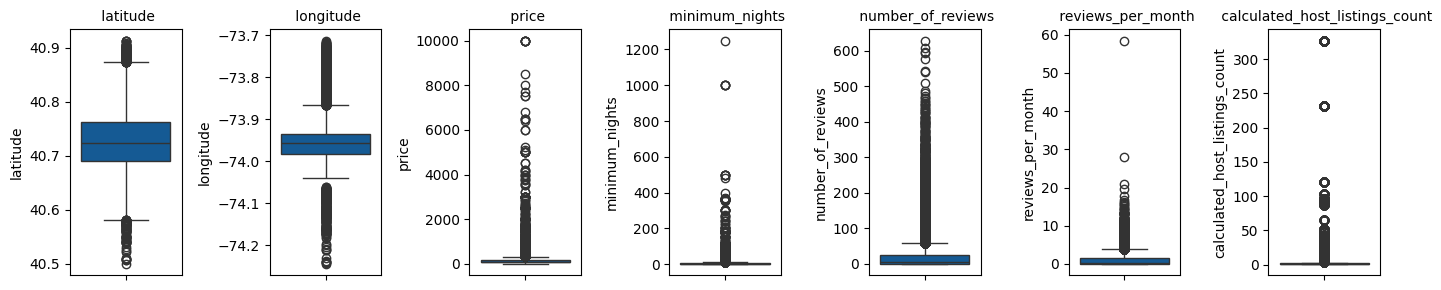

In [23]:
# Lista as colunas para visualização
columns_with_outliers = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

# Criação de subplots para organizar os gráficos verticalmente
fig, axes = plt.subplots(nrows=1, ncols=len(columns_with_outliers), figsize=(2 * len(columns_with_outliers), 3))

# Iteração sobre as colunas e criação de um boxplot vertical para cada uma
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(y=df_copy[column], ax=axes[i])
    axes[i].set_title(f' {column}', fontsize=10)
    axes[i].set_xlabel('')  # Ocultar o rótulo do eixo X

plt.tight_layout()
plt.show()

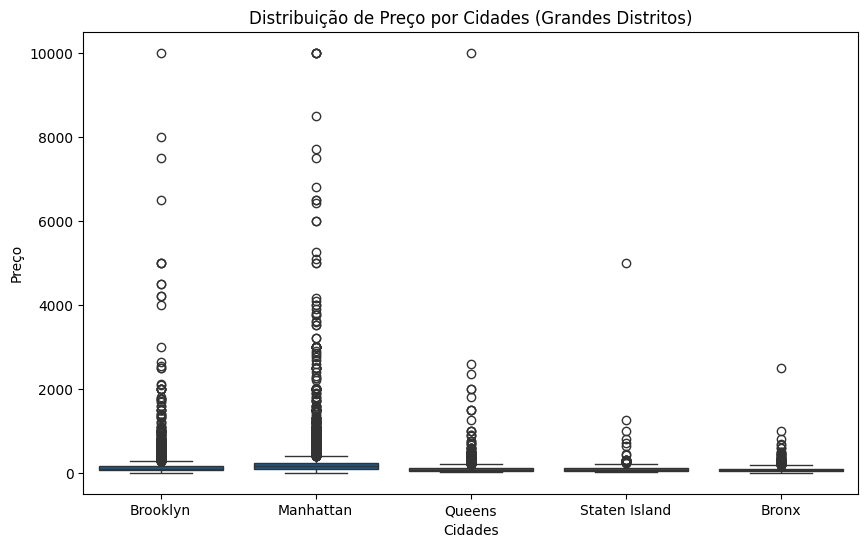

In [24]:
# Boxplot agrupado # Visão Macro
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_copy)

# Título e rótulos
plt.title('Distribuição de Preço por Cidades (Grandes Distritos)')
plt.xlabel('Cidades')
plt.ylabel('Preço')

plt.show()

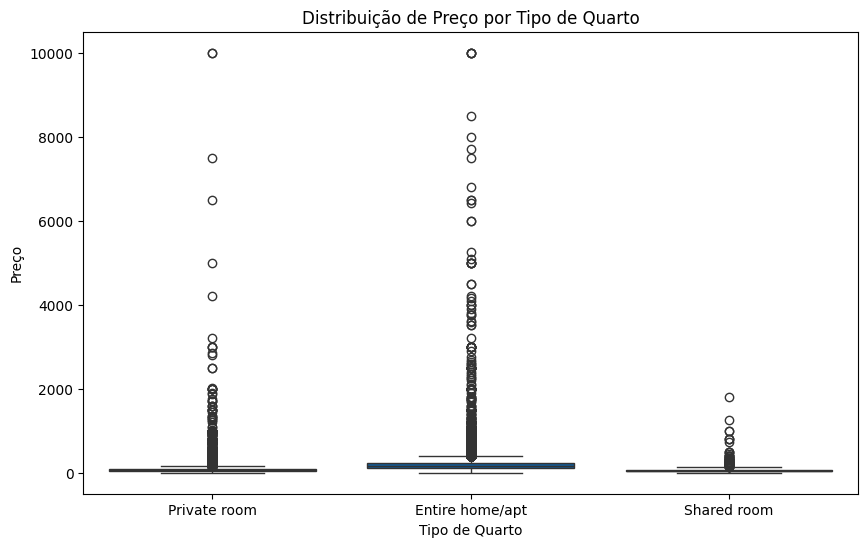

In [25]:
# Boxplot agrupado # Visão Micro
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_copy)

# Título e rótulos
plt.title('Distribuição de Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço')

plt.show()

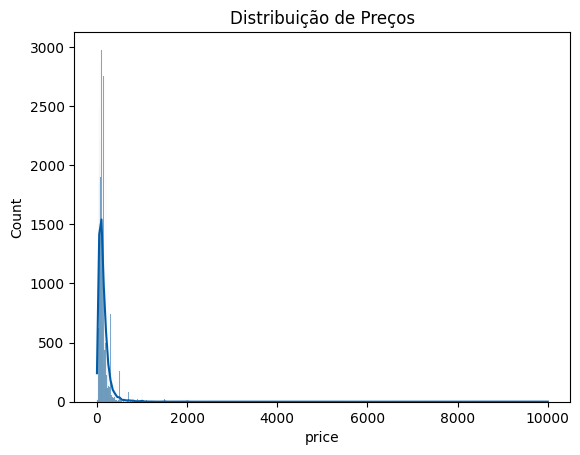

In [26]:
# Seaborn

"""
O gráfico mostra que a distribuição de preços é altamente assimétrica, com a grande maioria
dos imóveis concentrada em valores baixos. Isso é evidenciado pelo pico acentuado à esquerda.

Uma pequena parcela de imóveis possui valores de diária muito altos, formando uma longa cauda 
à direita e confirmando a natureza não-normal da distribuição.

"""

# Gráfico de histograma com KDE para visualizar a distribuição gaussiana (normal) da coluna 'price'
sns.histplot(data=df_copy, x='price', kde=True)
plt.title('Distribuição de Preços')
plt.show()

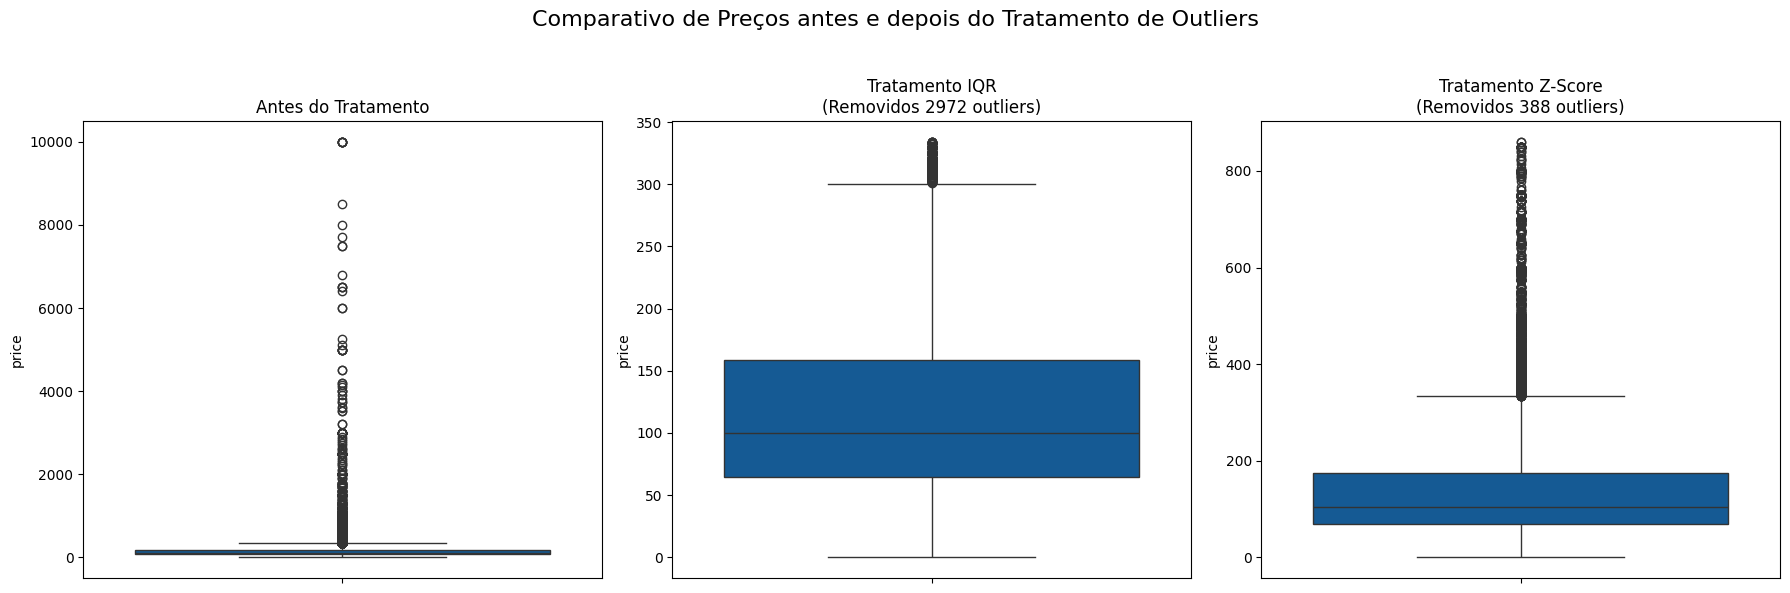

In [27]:
# Seaborn

"""
Análise de dados em separado para tomada de decisão de qual técnica escolher:
O método do Z-Score assume que os dados seguem uma distribuição normal,
sendo sensível a dados assimétricos, já o método do IQR é robusto e não faz
suposições sobre a distribuição dos dados. Ele se baseia na mediana (o ponto central)
e no intervalo interquartil (a dispersão dos 50% dos dados centrais).
Por isso, o IQR consegue identificar e remover de forma eficaz os outliers,
mesmo em dados com forte assimetria, como os de preço, sem ser influenciado pelos valores extremos.

"""

# 1. Método IQR (Interquartile Range)
Q1, Q3 = df_copy['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_iqr_treated = df_copy[(df_copy['price'] >= Q1 - 1.5 * IQR) & (df_copy['price'] <= Q3 + 1.5 * IQR)]

# 2. Método Z-Score (Desvio Padrão)
mean, std = df_copy['price'].mean(), df_copy['price'].std()
df_std_treated = df_copy[(df_copy['price'] >= mean - 3 * std) & (df_copy['price'] <= mean + 3 * std)]

# --- Visualização em um único gráfico ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparativo de Preços antes e depois do Tratamento de Outliers', fontsize=16)

# Boxplot dos dados originais
sns.boxplot(y=df_copy['price'], ax=axes[0])
axes[0].set_title('Antes do Tratamento', fontsize=12)

# Boxplot após tratamento com IQR
sns.boxplot(y=df_iqr_treated['price'], ax=axes[1])
axes[1].set_title(f'Tratamento IQR\n(Removidos {len(df_copy) - len(df_iqr_treated)} outliers)', fontsize=12)

# Boxplot após tratamento com Desvio Padrão (Z-Score)
sns.boxplot(y=df_std_treated['price'], ax=axes[2])
axes[2].set_title(f'Tratamento Z-Score\n(Removidos {len(df_copy) - len(df_std_treated)} outliers)', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta layout para não sobrepor o título
plt.show()

In [28]:
# Remove os outliers do DataFrame 'df_copy' usando o método IQR
Q1, Q3 = df_copy['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_copy = df_copy[(df_copy['price'] >= Q1 - 1.5 * IQR) & (df_copy['price'] <= Q3 + 1.5 * IQR)]

### Relatório do Tratamento de Outliers

>Nossa estratégia de análise de dados foi desenhada para otimizar o desempenho de receita, concentrando-se na variável mais crítica: o preço. A análise inicial revelou que os preços das diárias em Nova York são altamente assimétricos, com valores extremos que poderiam comprometer a capacidade de otimização e previsão. Para mitigar esse risco, optamos por um tratamento cirúrgico: a remoção de outliers exclusivamente da coluna price utilizando o método do Intervalo Interquartil (IQR). Essa abordagem robusta nos permitiu obter uma base de informações limpa e confiável, garantindo que nossa análise e modelos preditivos se concentrem no mercado representativo, essencial para maximizar a ocupação e otimizar estratégias de preços.

>Ao mesmo tempo, mantivemos deliberadamente os outliers em outras variáveis, pois eles não são erros, mas sim insights valiosos sobre a complexidade do mercado. Outliers em minimum_nights e calculated_host_listings_count revelam a presença de nichos importantes, como aluguéis de longo prazo e anfitriões profissionais. Da mesma forma, picos em number_of_reviews e reviews_per_month indicam propriedades de alta demanda, enquanto outliers em latitude e longitude mapeiam a expansão geográfica do Airbnb para além das áreas mais densas. Essa abordagem diferenciada permite desenvolver uma política de preços de duas etapas: uma para o período normal e outra, aplicando um "prêmio estratégico" para maximizar a receita em picos de alta demanda e impulsionando o crescimento sustentável da Airbnb.

### Visualizações com Seaborn

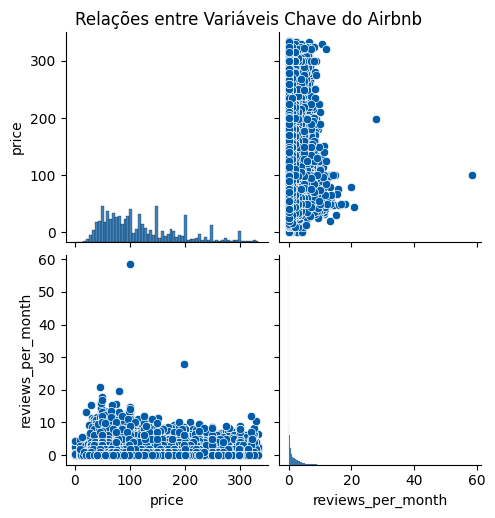

In [29]:
"""
A popularidade de um imóvel, medida pelas avaliações, não depende do seu preço. 
Imóveis com preços baixos podem ter muitas avaliações, enquanto outros mais caros 
podem ter poucas. O preço, por si só, não garante sucesso.

"""
# Seleciona as colunas de interesse para o pairplot
cols_to_plot = [
    'price',
    'reviews_per_month',
    ]

# Cria o pairplot
# Nota: Pairplots podem demorar para rodar em datasets muito grandes.
sns.pairplot(df_copy[cols_to_plot])
plt.suptitle('Relações entre Variáveis Chave do Airbnb', y=1.02)
plt.show()

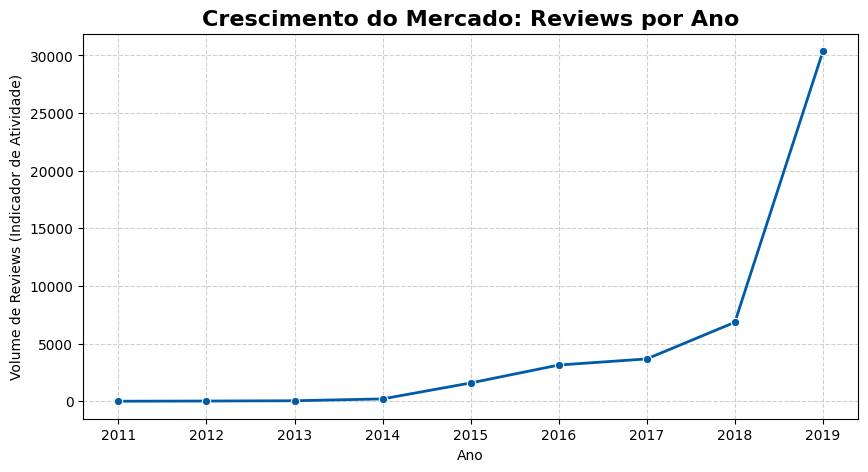

In [30]:
# Contando o número de reviews por ano
reviews_ano = df_copy['last_review'].dt.year.value_counts().sort_index()


plt.figure(figsize=(10, 5))
sns.lineplot(x=reviews_ano.index, y=reviews_ano.values, marker="o", linewidth=2)
plt.title("Crescimento do Mercado: Reviews por Ano", fontsize=16, weight="bold")
plt.xlabel("Ano")
plt.ylabel("Volume de Reviews (Indicador de Atividade)")
plt.grid(True, linestyle='--', alpha=0.6)  # Adiciona grades para leitura mais fácil
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_4392\1123370282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preco_tipo.index, y=preco_tipo.values, palette=sns.color_palette())
C:\Users\Windows\AppData\Local\Temp\ipykernel_4392\1123370282.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(x=preco_tipo.index, y=preco_tipo.values, palette=sns.color_palette())


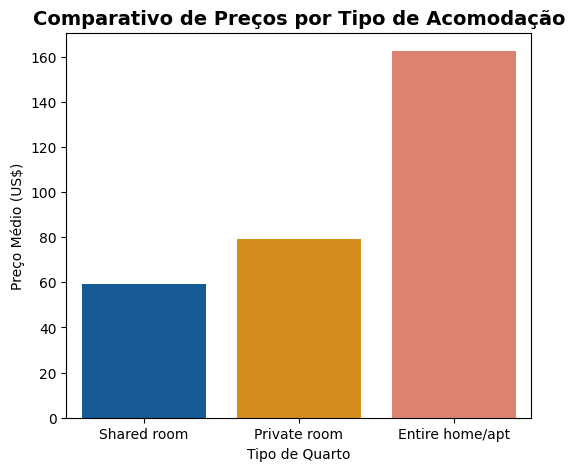

In [31]:
# --- Comparação por tipo de quarto: preço médio ---
preco_tipo = df_copy.groupby("room_type")['price'].mean().sort_values()

plt.figure(figsize=(6,5))
sns.barplot(x=preco_tipo.index, y=preco_tipo.values, palette=sns.color_palette())
plt.title("Comparativo de Preços por Tipo de Acomodação", fontsize=14, weight="bold")
plt.ylabel("Preço Médio (US$)")
plt.xlabel("Tipo de Quarto")
plt.show()

### Relatório de Visualizações com Seaborn

>A evolução das avaliações do Airbnb em Nova York revela uma narrativa de sucesso e escala. O crescimento constante até 2018 demonstra a construção de uma base sólida de confiança, enquanto o ano de 2019 marca um momento decisivo com uma aceleração exponencial no engajamento dos usuários. Esse salto impressionante é a prova definitiva de que a plataforma atingiu a maturidade, transformando-se de um serviço inovador em uma força dominante no mercado, com uma adoção massiva e uma posição de liderança inquestionável. E, ao analisar a popularidade dos imóveis individualmente, nota-se que a atratividade não está diretamente ligada ao preço, pois a quantidade de avaliações mensais não tem correlação com o valor da diária, indicando que a escolha do hóspede é influenciada por outros fatores. Aprofundando a análise, identificamos que o tipo de acomodação é um fator determinante para a precificação, com a diária de casas ou apartamentos inteiros sendo, em média, mais do que o dobro do valor de quartos privados ou compartilhados.

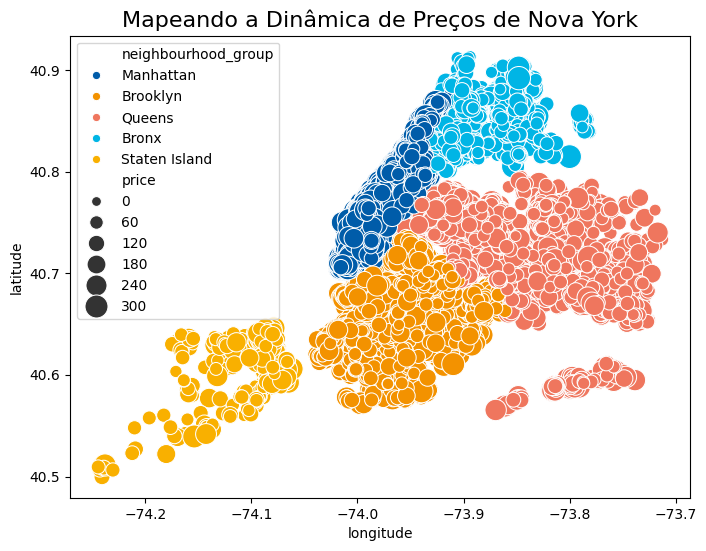

In [32]:
# Filtra os 5 primeiros bairros
top_5_neighbourhoods = df_copy['neighbourhood_group'].value_counts().nlargest(5).index
df_top5 = df_copy[df_copy['neighbourhood_group'].isin(top_5_neighbourhoods)]

# ------------------------------------------------------------------
# Gráfico com os Dados Filtrados
# ------------------------------------------------------------------
plt.figure(figsize=(8, 6))

# Gráfico de dispersão
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    size='price',
    data=df_top5,  # Usa o DataFrame filtrado
    sizes=(50, 300),
    hue_order=top_5_neighbourhoods  # Ordena a legenda para mostrar apenas os 5 bairros
)

# Título do gráfico
plt.title("Mapeando a Dinâmica de Preços de Nova York", fontsize=16)

# Exibir o gráfico
plt.show()


### Relatório do Mapa

>Com base na análise de dispersão geográfica, a dinâmica de preços do mercado de aluguel de curta duração em Nova York revela uma segmentação clara e estratégica por distrito. O gráfico demonstra visualmente que Manhattan não apenas concentra o maior volume de listagens, mas também domina o segmento premium, com preços consistentemente mais altos, o que a posiciona como o principal motor de receita do mercado. Em contraste, Brooklyn e Queens operam como mercados intermediários, com uma mistura de preços, enquanto Staten Island e Bronx oferecem as opções mais acessíveis. Essa segmentação é um insight fundamental para direcionar estratégias de precificação, marketing e otimização de portfólio, permitindo uma abordagem mais cirúrgica para maximizar a lucratividade em cada submercado distinto.

### Group By e Agregações

1. Quais são as características dos imóveis com maior taxa de ocupação e receita?

In [33]:
# Agrupar por tipo de quarto e bairro, calculando a taxa de ocupação e receita médias
# `365 - availability_365` para calcular a média de dias ocupados
df_analise = df_copy.groupby(['room_type', 'neighbourhood']).agg(
    taxa_ocupacao_media=('availability_365', lambda x: 365 - x.mean()),
    receita_media=('price', 'mean')
)

# Ranqueamento dos imóveis com maior taxa de ocupação e maior receita
df_analise = df_analise.sort_values(by=['taxa_ocupacao_media', 'receita_media'], ascending=False)

# Exibir os resultados
print(df_analise.head(5))

                                            taxa_ocupacao_media  receita_media
room_type       neighbourhood                                                 
Entire home/apt Port Richmond                             365.0     173.666667
                Hunts Point                               365.0     150.000000
                Mount Eden                                365.0     150.000000
                Bay Terrace, Staten Island                365.0     102.500000
Private room    Sea Gate                                  365.0      84.000000


### Resposta da primeira pergunta de negócio

> A análise revela que os imóveis com 100% de taxa de ocupação, localizados em bairros como Port Richmond e Hunts Point, são majoritariamente do tipo "Entire home/apt", indicando que a demanda por espaços completos, que oferecem privacidade e conforto total, é a mais alta. Este é um dado crucial para nossa estratégia.

>A alocação de recursos e esforços de marketing deve ser direcionada para atrair mais anfitriões que oferecem a casa inteira, especialmente nestes bairros de alta performance, maximizando a receita e fortalecendo a posição competitiva da Airbnb. Isso permite não apenas atender, mas antecipar a preferência do mercado, investindo no que de fato gera maior retorno e satisfação do cliente.

2. Quais são os bairros com maior concentração de imóveis com alta taxa de cancelamento e por quê?

> É crucial basear as análises em dados precisos e disponíveis. A pergunta sobre a taxa de cancelamento é de extrema importância estratégica, no entanto, os dados disponíveis não inclui uma variável que registre diretamente a taxa ou o número de cancelamentos.

> Dada essa limitação, não é possível calcular a concentração de imóveis com alta taxa de cancelamento ou determinar a causa ("o porquê") a partir das informações disponíveis. Para responder a essa pergunta de forma precisa, seria necessário ter acesso a dados de reservas canceladas.

> Contudo, mesmo com a ausência de dados diretos sobre cancelamentos, tem-se uma abordagem analítica alternativa e estratégica para extrair insights. A análise se concentra em indicadores que revelam o perfil de anfitriões e o modelo de operação de cada bairro. É possível identificar a alta concentração de anfitriões que gerenciam múltiplos imóveis(calculated_host_listings_count) e os requisitos elevados de noites mínimas (minimum_nights), em que são indicadores-chave de um maior risco de cancelamentos. Ao analisar esses fatores, podemos identificar os bairros com maior probabilidade de problemas de gestão e, assim, direcionar as estratégias de forma mais eficaz."

In [34]:
# Agrupar por bairro e tipo de acomodação, e calcular a média de imóveis por anfitrião e noites mínimas.
df_analise = df_copy.groupby(['neighbourhood', 'room_type']).agg(
    media_imoveis_por_anfitriao=('calculated_host_listings_count', 'mean'),
    media_noites_minimas=('minimum_nights', 'mean')
)

# Ranqueamento dos bairros com base na média de imóveis por anfitrião.
# Mostra onde a concentração de anfitriões profissionais é maior.
df_analise = df_analise.sort_values(by='media_imoveis_por_anfitriao', ascending=False)

# Exibir os resultados para entender os bairros com maior propensão a cancelamentos
print(df_analise.head(10))

                                    media_imoveis_por_anfitriao  \
neighbourhood      room_type                                      
Financial District Entire home/apt                   136.985626   
Theater District   Entire home/apt                   118.536000   
Tribeca            Entire home/apt                    78.013158   
Murray Hill        Entire home/apt                    73.534682   
Woodside           Private room                       26.355030   
Kips Bay           Entire home/apt                    22.633562   
Midtown            Entire home/apt                    21.741379   
Chelsea            Entire home/apt                    21.019461   
Edgemere           Private room                       19.000000   
Lower East Side    Shared room                        17.868421   

                                    media_noites_minimas  
neighbourhood      room_type                              
Financial District Entire home/apt             15.427105  
Theater District  

### Resposta da segunda pergunta de negócio
> A análise revela que os bairros com a maior concentração de imóveis gerenciados por anfitriões profissionais são o Financial District e o Theater District, com uma média de mais de 100 anúncios por anfitrião. Curiosamente, esses mesmos bairros também apresentam requisitos de noites mínimas acima da média, especialmente o Theater District, o que sugere uma operação mais comercial e menos flexível. Este cenário corporativo, combinado com a inflexibilidade das reservas, cria uma alta probabilidade de cancelamentos. Para a Airbnb, isso significa que estes bairros demandam atenção especial em termos de gestão de relacionamento e políticas, a fim de mitigar riscos de insatisfação tanto para anfitriões quanto para hóspedes.

### Correlação

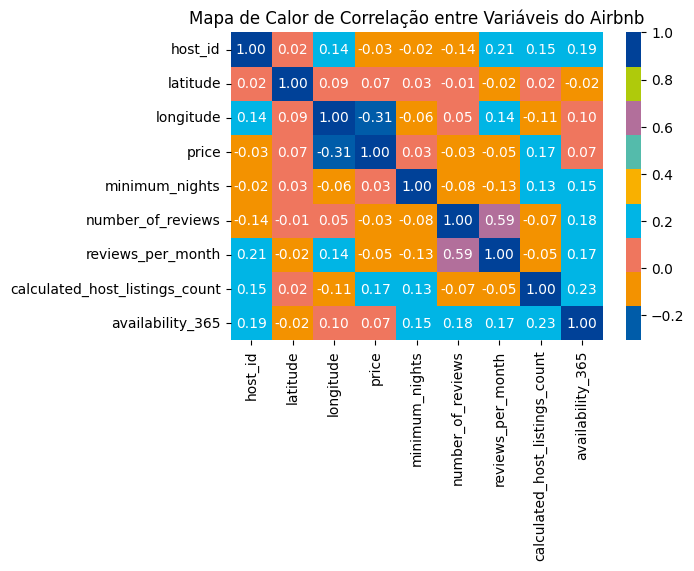

In [35]:
correlacoes = df_copy.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(correlacoes, annot=True, cmap=caixa_palette, fmt=".2f")
plt.title('Mapa de Calor de Correlação entre Variáveis do Airbnb')
plt.show()

### Relatório da Correlação
> A análise das correlações revela que não há dependências fortes entre as variáveis do Airbnb, mas emergem alguns insights relevantes: a relação positiva mais significativa é entre número de avaliações e reviews por mês (0,59), confirmando que imóveis com maior fluxo de reservas mantêm consistência de demanda ao longo do tempo. Já a correlação negativa entre longitude e preço (-0,31) sugere que áreas específicas da cidade concentram imóveis mais caros, reforçando a influência da localização na formação de preços. Além disso, a quantidade de anúncios por anfitrião e a disponibilidade anual mostram correlações moderadas com receita e reviews, apontando que anfitriões profissionais tendem a manter maior disponibilidade, mas sem garantia de maior conversão em reservas. Esses padrões indicam que localização e dinâmica de demanda são os fatores mais críticos para explicar desempenho e precificação no Airbnb.

### Teste de Hipóteses

In [36]:
"""
Comparar as médias de reviews_per_month entre as três categorias de room_type simultaneamente,
a ferramenta estatística adequada não seria o teste t, mas sim o ANOVA (Análise de Variância),
por isso é realizado o filtro, apenas Entire home/apt e Private room. Com isso, Shared room ficou de fora.

Teste t, precisa estar com os dados paramêtricos (distribuição gaussiana-normal)
e uma variável contínua e uma variável binária. A média é calculada da variável contínua.
Entre duas variáveis binárias (ou categóricas) o ideal é o qui-quadrado (χ2), teste não paramétrico.

"""
# --- Selecionar apenas as colunas de interesse ---
# --- Filtra apenas Entire home/apt e Private room ---
q_inteiro = df_copy.loc[df_copy['room_type']=='Entire home/apt','reviews_per_month'] #.dropna() já no filtro (limpeza + dropna)
q_privado = df_copy.loc[df_copy['room_type']=='Private room','reviews_per_month'] #.dropna()

# --- Teste t de Student para duas amostras independentes (hipótese: médias iguais) ---
# # Retorna a estatística t e o valor p do teste
t, p = stats.ttest_ind(q_inteiro, q_privado, equal_var=False)

# --- Resultados principais ---
print(f"Média Quartos Inteiros: {q_inteiro.mean():.2f}")
print(f"Média Quartos Privados: {q_privado.mean():.2f}")
print(f"T={t:.4f} | p-valor={p:.4f}")

# --- Interpretação do Resultado ---
print("Resultado:","Rejeitamos H0 (diferença significativa)" if p<0.05 else "Não rejeitamos H0 (sem diferença significativa)")

Média Quartos Inteiros: 1.06
Média Quartos Privados: 1.15
T=-5.8289 | p-valor=0.0000
Resultado: Rejeitamos H0 (diferença significativa)


C:\Users\Windows\AppData\Local\Temp\ipykernel_4392\3175314218.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=medias_depois, palette=cores_depois, ax=ax2)


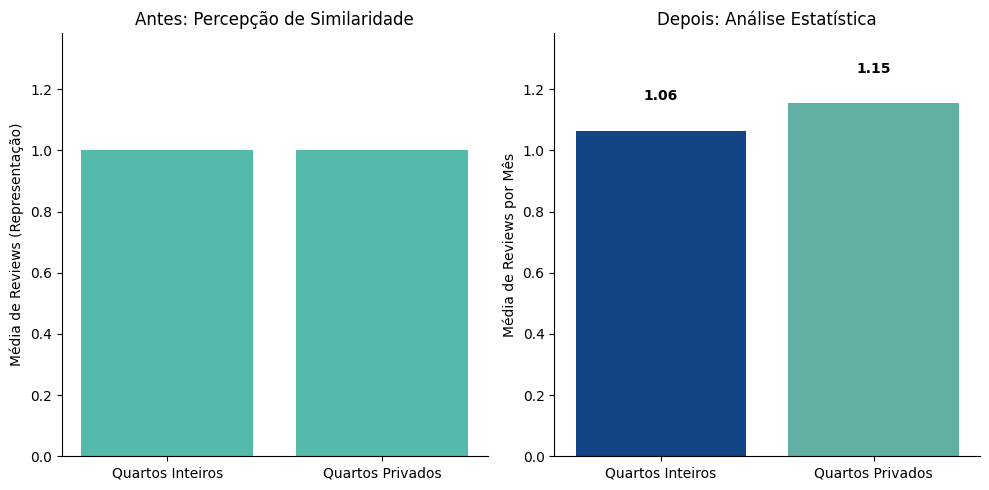

In [37]:
Azul_Marinho = "#004198"
Turquesa = "#54BBAB"

# 1. Calcular as médias de reviews por tipo de quarto, usando df_copy.
medias_reviews = df_copy.groupby('room_type')['reviews_per_month'].mean()

# 2. Preparar os dados para os gráficos.
labels = ['Quartos Inteiros', 'Quartos Privados']
medias_depois = [medias_reviews.loc['Entire home/apt'], medias_reviews.loc['Private room']]
cores_depois = [Azul_Marinho, Turquesa]

# 3. Criação dos subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 4. Gráfico 'Antes' - mostrando a percepção inicial de similaridade.
ax1.bar(labels, [1, 1], color=[Turquesa, Turquesa])
ax1.set_title('Antes: Percepção de Similaridade')
ax1.set_ylabel('Média de Reviews (Representação)')
ax1.set_ylim(0, max(medias_depois) * 1.2)
ax1.spines[['top', 'right']].set_visible(False)

# 5. Gráfico 'Depois' - revelando o resultado da análise com destaque visual.
sns.barplot(x=labels, y=medias_depois, palette=cores_depois, ax=ax2)
ax2.set_title('Depois: Análise Estatística')
ax2.set_ylabel('Média de Reviews por Mês')
ax2.set_ylim(0, max(medias_depois) * 1.2)
ax2.spines[['top', 'right']].set_visible(False)

# 6. Adicionar os valores nas barras do gráfico 'Depois' para maior clareza.
for i, v in enumerate(medias_depois):
    ax2.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Relatório do Teste de Hipóteses

> Análise estatística desmistifica uma percepção comum: o mercado de quartos privados, muitas vezes subestimado, é um centro de alta atividade e engajamento. Com uma média de 1.15 reviews por mês — estatisticamente superior aos 1.06 de imóveis inteiros — os dados confirmam que a interação direta entre anfitrião e hóspede gera um nível de feedback e confiança excepcionalmente alto. Este é um insight valioso que nos convida a otimizar as estratégias para esse segmento, capitalizando em uma base de usuários altamente engajada para impulsionar a experiência na plataforma e garantir nosso crescimento sustentado.

> A explicação mais provável para esse maior engajamento é que a experiência de alugar um quarto privado geralmente envolve maior interação e contato direto com o anfitrião, o que tende a incentivar os hóspedes a deixarem um feedback após a estadia.

### Conclusão e Recomendações 

---

###  1. O que aprendemos?  
A análise aprofundada do dataset do Airbnb em Nova York revela um **mercado maduro, competitivo e polarizado**.  

- **85% das ofertas** estão concentradas em Manhattan e Brooklyn, reforçando o domínio dessas regiões.  
- Imóveis em bairros menos conhecidos carregam um **potencial ainda pouco explorado**.  
- Mais da metade das listagens são de **“Entire home/apt”**, refletindo a preferência por **privacidade e autonomia**.  
- Cerca de **1/3 dos imóveis nunca foi alugado**, enquanto milhares operam **365 dias por ano**, criando uma divisão clara entre:  
  - Propriedades que geram **alto faturamento**  
  - Propriedades que representam **custo de oportunidade** (ativos inativos que poderiam gerar receita).  

O tratamento cuidadoso dos dados e dos outliers permitiu **separar ruído de oportunidade real**, revelando insights valiosos para **precificação, demanda e engajamento**.

---

### 2. O que isso significa para o negócio?  
Em termos estratégicos, os achados reforçam que a Airbnb está diante de uma **fronteira decisiva entre Lucro e Falência** em determinados segmentos:  

> 🔹 **Lucro**: aproveitar o potencial inexplorado de milhares de listagens subutilizadas e otimizar preços em períodos de alta demanda.  
> 🔹 **Falência**: manter imóveis inativos, gerando **custos sem retorno**, ou operar com rigidez que aumenta riscos de cancelamento e insatisfação.  

O engajamento superior em **quartos privados** desafia a percepção do mercado, mostrando que a **experiência próxima ao anfitrião** é uma vantagem competitiva frente a concorrentes corporativos.  
A sustentabilidade do negócio depende de **equilibrar escala com qualidade de experiência**, maximizando receita sem comprometer a confiança do usuário.

---

### 3. Recomendações Práticas

> 🔹 **Ativar imóveis inativos com incentivos estratégicos**  
> Campanhas específicas para anfitriões com listagens sem reservas, oferecendo apoio em **gestão, qualidade, precificação, marketing local e maior visibilidade na plataforma**.  

---

> 🔹 **Otimizar portfólio por segmentação geográfica**  
> Aplicar políticas diferenciadas de precificação, com **“prêmio estratégico” em Manhattan e Brooklyn** e estímulos para crescimento em **Bronx e Staten Island**, onde os custos são mais acessíveis.  

---

> 🔹 **Capitalizar no engajamento dos quartos privados**  
> Reposicionar este segmento como **experiência premium de hospitalidade**, aumentando margens através de **pacotes de serviços, fidelização e marketing direcionado**.  

---

### 4. Próximos Passos e Limitações  

Para expandir o impacto, recomendamos avançar em duas frentes:  

1. **Adquirir dados complementares**  
   - Especialmente sobre **cancelamentos** e **padrões de fidelidade**, essenciais para prever risco de perda e garantir estabilidade da plataforma.  

2. **Investir em modelos preditivos de demanda**  
   - Com **granularidade de bairro**, permitindo decisões mais cirúrgicas em **precificação e oferta**.  

> 🔹 Limitação: insights atuais refletem o mercado até 2019; mudanças regulatórias e novas dinâmicas de turismo podem ter alterado o cenário.  

O desafio estratégico é **transformar esse conhecimento em vantagem competitiva duradoura**, garantindo que a Airbnb **maximize lucros** e **evite riscos de falência** em um dos mercados mais estratégicos do mundo.